In [73]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

futures_2020 = pd.read_csv("futures_2020_clean.csv")
futures_2021 = pd.read_csv("futures_2021_clean.csv")
futures_2022 = pd.read_csv("futures_2022.csv")
weather_2020 = pd.read_csv("weather_2020.csv")
weather_2021 = pd.read_csv("weather_2021.csv")
weather_2022 = pd.read_csv("weather_2022.csv")


In [77]:
df_prices = pd.concat([futures_2020, futures_2021, futures_2022], axis=0)
df_prices = df_prices.drop(columns=['Unnamed: 0'])
df_prices = df_prices.reset_index(drop=True)
df_prices['month'] = np.nan
def generate_month_list():
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    month_pos = 0
    month_list = []
    for i in range(756):
        month = months[month_pos]
        month_list.append(month)
        if (i + 1) % 21 == 0:
            month_pos = (month_pos + 1) % 12
    return month_list

# Generate month list
month_list = generate_month_list()

# Add 'month' column to existing DataFrame
df_prices['month'] = month_list
df_prices = df_prices[["SBL", "month"]]
df_prices

,SBL,month
0,56.316986,Jan
1,56.440153,Jan
2,56.044916,Jan
3,56.339452,Jan
4,56.177335,Jan
...,...,...
751,55.135070,Dec
752,54.560876,Dec
753,54.567841,Dec
754,54.219595,Dec


In [79]:
weather_prices = pd.concat([weather_2020, weather_2021, weather_2022], axis=0)
weather_prices = weather_prices.drop(columns=['Unnamed: 0'])
weather_prices = weather_prices.reset_index(drop=True)
df = df_prices.join(weather_prices)
df

,SBL,month,weather
0,56.316986,Jan,1.013368
1,56.440153,Jan,1.223060
2,56.044916,Jan,-0.447239
3,56.339452,Jan,0.148754
4,56.177335,Jan,0.465278
...,...,...,...
751,55.135070,Dec,-1.398723
752,54.560876,Dec,-1.056387
753,54.567841,Dec,-1.637809
754,54.219595,Dec,-1.950158


In [80]:
df.describe()

,SBL,weather
count,756.000000,756.000000
mean,56.367310,0.704432
std,3.530439,1.756064
min,49.379183,-3.482838
25%,53.893980,-0.453479
50%,55.942036,0.830278
75%,58.959218,1.890641
max,65.792667,5.412454


Text(0.5, 1.0, 'Future Price Over Time')

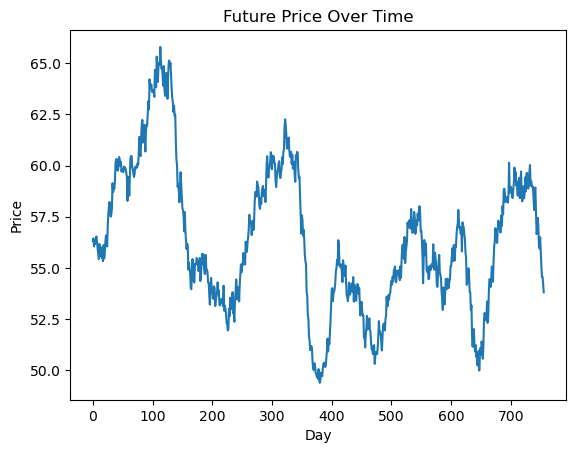

In [81]:
sns.lineplot(data=df, x=df.index, y="SBL")
plt.xlabel("Day")
plt.ylabel("Price")
plt.title("Future Price Over Time")

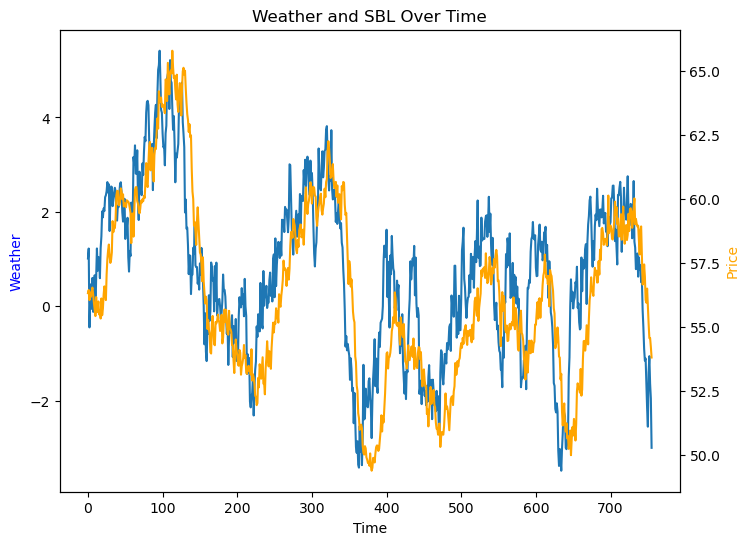

In [82]:
fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

# Plot the data on the first axis
sns.lineplot(data=df, x=df.index, y="weather", ax=ax1)

# Plot the data on the second axis
sns.lineplot(data=df, x=df.index, y="SBL", ax=ax2, color='orange')

# Set the labels and titles
ax1.set_xlabel('Time')
ax1.set_ylabel('Weather', color='blue')
ax2.set_ylabel('Price', color='orange')
ax1.set_title('Weather and SBL Over Time')

plt.show()

0.7992952623820576


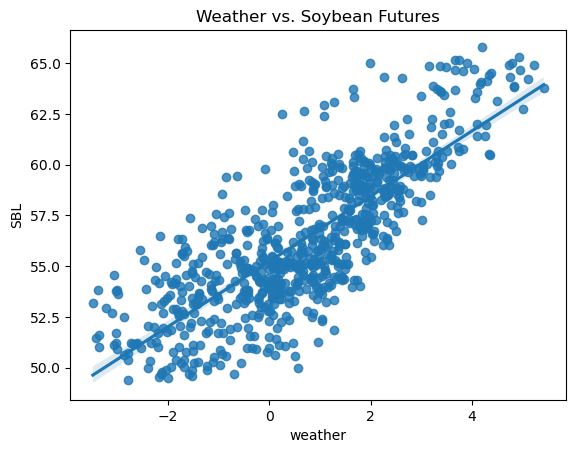

In [83]:
sns.regplot(data=df, x="weather", y = "SBL")
plt.title("Weather vs. Soybean Futures")
print(np.corrcoef(df["weather"], df["SBL"])[0, 1])

Text(0.5, 1.0, 'Weather Over Time')

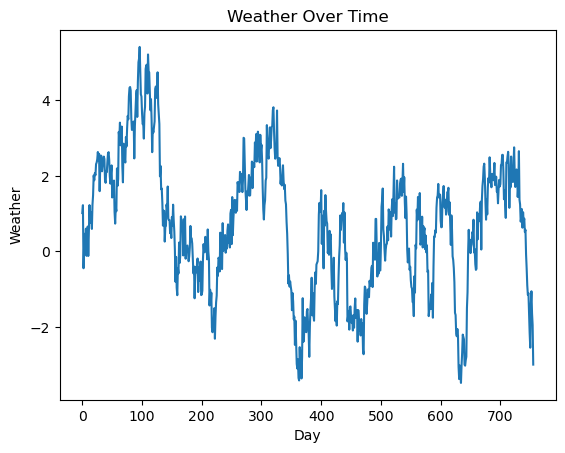

In [84]:
sns.lineplot(data=df, x=df.index, y="weather")
plt.xlabel("Day")
plt.ylabel("Weather")
plt.title("Weather Over Time")

Text(0.5, 1.0, 'Weather Over Time')

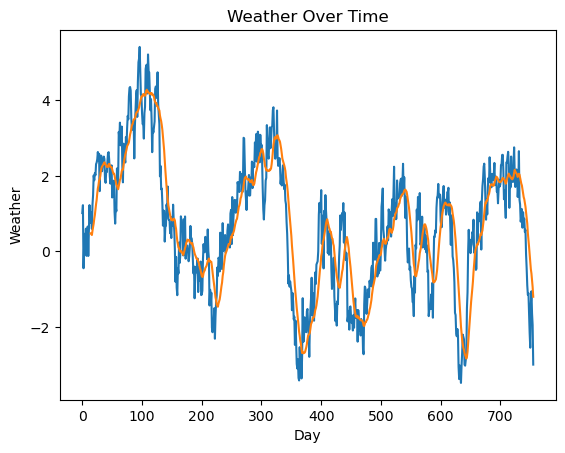

In [85]:
weather_window_size = 15
smoothed_data = df["weather"].rolling(weather_window_size).mean()

#Plot data 
sns.lineplot(data=df, x=df.index, y="weather")
sns.lineplot(data=df, x=df.index, y=smoothed_data)
plt.xlabel("Day")
plt.ylabel("Weather")
plt.title("Weather Over Time")

In [86]:
df["smoothed_data"] = smoothed_data
df

,SBL,month,weather,smoothed_data
0,56.316986,Jan,1.013368,NaN
1,56.440153,Jan,1.223060,NaN
2,56.044916,Jan,-0.447239,NaN
3,56.339452,Jan,0.148754,NaN
4,56.177335,Jan,0.465278,NaN
...,...,...,...,...
751,55.135070,Dec,-1.398723,-0.471624
752,54.560876,Dec,-1.056387,-0.583865
753,54.567841,Dec,-1.637809,-0.762143
754,54.219595,Dec,-1.950158,-0.943906


In [87]:
df.dropna()
df["day"] = df.index
df

,SBL,month,weather,smoothed_data,day
0,56.316986,Jan,1.013368,NaN,0
1,56.440153,Jan,1.223060,NaN,1
2,56.044916,Jan,-0.447239,NaN,2
3,56.339452,Jan,0.148754,NaN,3
4,56.177335,Jan,0.465278,NaN,4
...,...,...,...,...,...
751,55.135070,Dec,-1.398723,-0.471624,751
752,54.560876,Dec,-1.056387,-0.583865,752
753,54.567841,Dec,-1.637809,-0.762143,753
754,54.219595,Dec,-1.950158,-0.943906,754


In [88]:
def rmse(predicted, actual): 
    return np.sqrt(np.mean((predicted-actual)**2))
predict = df["weather"].ewm(alpha=0.4).mean()
print(rmse(predict, df["weather"]))

0.33542451539970153


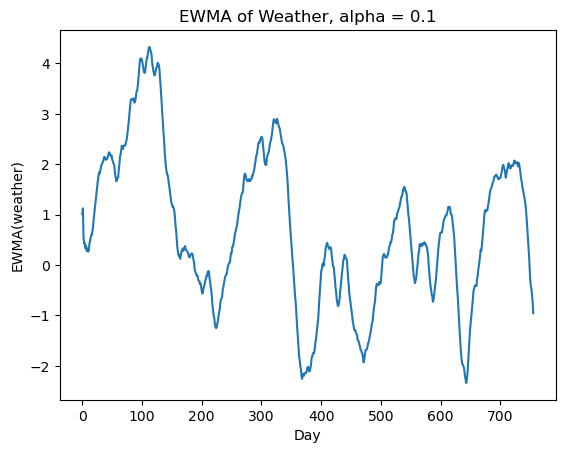

<function matplotlib.pyplot.show(close=None, block=None)>

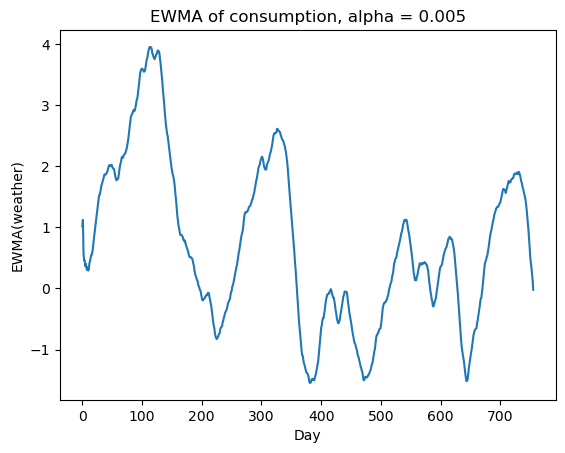

In [89]:
plt.title("EWMA of Weather, alpha = 0.1")
plt.xlabel("Day")
plt.ylabel("EWMA(weather)")
plt.plot(df["weather"].ewm(alpha=0.1).mean())
plt.show()
plt.title("EWMA of consumption, alpha = 0.005")
plt.xlabel("Day")
plt.ylabel("EWMA(weather)")
plt.plot(df["weather"].ewm(alpha=0.05).mean())
plt.show

In [90]:
#Price Momentum
def price_momentum(table):
    # Calculate the 5-day price momentum
    price_momentum = table.diff(5)
    return price_momentum
    # Print the price momentum

In [91]:
#Create RSI
import pandas_ta as pta
rsi = pta.rsi(df['SBL'], length = 5).dropna()
df["rsi"] = rsi
df["price momentum"] = price_momentum(df["weather"])
df['1-month RMA'] = df['SBL'].rolling(window=21).mean()
df['2-month RMA'] = df["SBL"].rolling(window=42).mean()
df['3-month RMA'] = df["SBL"].rolling(window=63).mean()
df.dropna()

,SBL,month,weather,smoothed_data,day,rsi,price momentum,1-month RMA,2-month RMA,3-month RMA
62,59.445995,Mar,3.000793,1.803261,62,53.213087,1.937692,59.681998,58.945360,57.943978
63,60.357855,Apr,3.408159,1.891704,63,66.159760,1.213164,59.710807,59.042860,58.008119
64,60.456797,Apr,2.808951,1.927223,64,67.383901,1.074315,59.735171,59.135093,58.071875
65,60.465311,Apr,2.810322,2.019474,65,67.510308,0.897077,59.737597,59.231651,58.142040
66,59.921514,Apr,3.303699,2.125044,66,51.556408,0.141559,59.720095,59.323898,58.198898
...,...,...,...,...,...,...,...,...,...,...
751,55.135070,Dec,-1.398723,-0.471624,751,23.112937,-0.245909,57.800887,58.387753,58.544155
752,54.560876,Dec,-1.056387,-0.583865,752,18.568923,0.048789,57.557596,58.276425,58.475788
753,54.567841,Dec,-1.637809,-0.762143,753,18.810973,0.026093,57.297918,58.181878,58.411074
754,54.219595,Dec,-1.950158,-0.943906,754,15.864139,0.209369,57.069782,58.079142,58.347754


In [92]:
df["predicted weather"] = df["weather"].ewm(alpha=0.4).mean()
df

,SBL,month,weather,smoothed_data,day,rsi,price momentum,1-month RMA,2-month RMA,3-month RMA,predicted weather
0,56.316986,Jan,1.013368,NaN,0,NaN,NaN,NaN,NaN,NaN,1.013368
1,56.440153,Jan,1.223060,NaN,1,NaN,NaN,NaN,NaN,NaN,1.144426
2,56.044916,Jan,-0.447239,NaN,2,NaN,NaN,NaN,NaN,NaN,0.332352
3,56.339452,Jan,0.148754,NaN,3,NaN,NaN,NaN,NaN,NaN,0.247978
4,56.177335,Jan,0.465278,NaN,4,NaN,NaN,NaN,NaN,NaN,0.342227
...,...,...,...,...,...,...,...,...,...,...,...
751,55.135070,Dec,-1.398723,-0.471624,751,23.112937,-0.245909,57.800887,58.387753,58.544155,-1.735056
752,54.560876,Dec,-1.056387,-0.583865,752,18.568923,0.048789,57.557596,58.276425,58.475788,-1.463588
753,54.567841,Dec,-1.637809,-0.762143,753,18.810973,0.026093,57.297918,58.181878,58.411074,-1.533276
754,54.219595,Dec,-1.950158,-0.943906,754,15.864139,0.209369,57.069782,58.079142,58.347754,-1.700029


<AxesSubplot:title={'center':'RSI/Day'}, xlabel='Day', ylabel='RSI'>

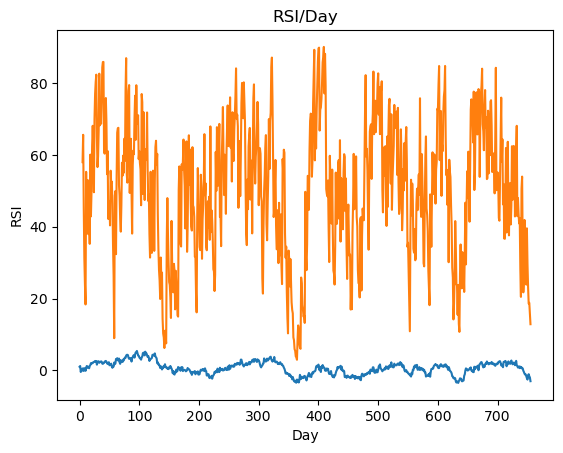

In [93]:
plt.xlabel("Day")
plt.ylabel("RSI")
plt.title("RSI/Day")
sns.lineplot(data=df, x=df.index, y="weather")
rsi.plot()

In [97]:
def predict(parameters, theta):
    return parameters @ theta

In [98]:
from sklearn.metrics import mean_squared_error
df = df.dropna()
X = df[["predicted weather", "rsi", "price momentum", "1-month RMA", "2-month RMA", "3-month RMA"]]
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
Y = df["SBL"]
theta = np.linalg.inv(X.T @ X) @ X.T @ Y


predictions = predict(X, theta)
mse = mean_squared_error(Y, predictions)
mse

0.10453227350592705

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
X = df[["predicted weather", "rsi", "price momentum"]]
Y = df["SBL"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
ensemble_model = BaggingRegressor(base_estimator=random_forest_model, n_estimators=10, random_state=42)
ensemble_model.fit(X_train, y_train)

rf_predicted_price = ensemble_model.predict(X_test)
mean_squared_error(y_test, rf_predicted_price)

2.0059854487078748